In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
X_train = pd.read_csv('/content/drive/MyDrive/DS201/ UIT-VSFC/train/sents.txt',sep='\n', header=None, index_col=None)
y_train =pd.read_csv('/content/drive/MyDrive/DS201/ UIT-VSFC/train/sentiments.txt',sep='\n', header=None, index_col=None)
X_dev = pd.read_csv('/content/drive/MyDrive/DS201/ UIT-VSFC/dev/sents.txt',sep='\n', header=None, index_col=None)
y_dev = pd.read_csv('/content/drive/MyDrive/DS201/ UIT-VSFC/dev/sentiments.txt',sep='\n', header=None, index_col=None)
X_test = pd.read_csv('/content/drive/MyDrive/DS201/ UIT-VSFC/test/sents.txt',sep='\n', header=None, index_col=None)
y_test = pd.read_csv('/content/drive/MyDrive/DS201/ UIT-VSFC/test/sentiments.txt',sep='\n', header=None, index_col=None)



y_train = y_train.values.flatten()
y_dev = y_dev.values.flatten()
y_test = y_test.values.flatten()

In [78]:
X_train.shape

(11426, 1)

In [79]:
X_dev.shape

(1583, 1)

In [80]:
X_test.shape

(3166, 1)

In [81]:
(X_train.shape[0]) / (X_train.shape[0] + X_dev.shape[0] + X_test.shape[0])

0.7063987635239567

In [82]:
X_dev.shape[0] / (X_train.shape[0] + X_dev.shape[0] + X_test.shape[0])

0.09786707882534776

In [83]:
X_test.shape[0] / (X_train.shape[0] + X_dev.shape[0] + X_test.shape[0])

0.19573415765069552

Ti le Train : Test : Dev = 7:2:1

In [84]:
y_dev

array([0, 0, 2, ..., 0, 0, 0])

##TRAIN

In [85]:
label1= list(set(y_train))

In [86]:
list_label1=dict()

for l in label1:
  list_label1[l] = list(y_train).count(l)

In [87]:
list_label1

{0: 5325, 1: 458, 2: 5643}

Text(0.5, 1.0, 'Bieu do tron tap Train')

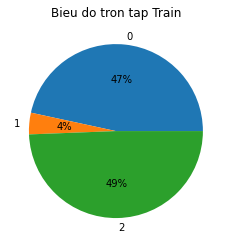

In [88]:
plt.pie(x=list_label1.values(),labels=list_label1.keys(),autopct='%.0f%%')
plt.title("Bieu do tron tap Train")

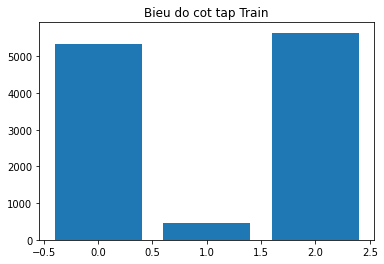

In [89]:
plt.bar(list_label1.keys(),list_label1.values())
plt.title("Bieu do cot tap Train")
plt.show()

##TEST

In [90]:
label2= list(set(y_test))

In [91]:
list_label2=dict()

for l in label2:
   list_label2[l]=list(y_test).count(l)

In [92]:
list_label2

{0: 1409, 1: 167, 2: 1590}

Text(0.5, 1.0, 'Bieu do tron tap Test')

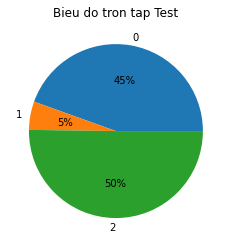

In [93]:
plt.pie(x=list_label2.values(),labels=list_label2.keys(),autopct='%.0f%%')
plt.title("Bieu do tron tap Test")

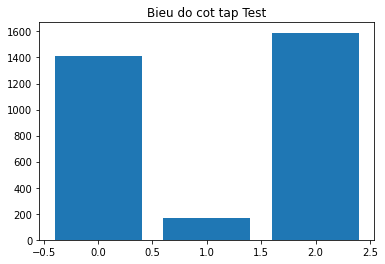

In [94]:
plt.bar(list_label2.keys(),list_label2.values())
plt.title("Bieu do cot tap Test")
plt.show()

##DEV

In [95]:
label3 = list(set(y_dev))

In [96]:
list_label3 = dict()

for l in label3:
  list_label3[l]=list(y_dev).count(l)

In [97]:
list_label3

{0: 705, 1: 73, 2: 805}

Text(0.5, 1.0, 'Bieu do tron tap Dev')

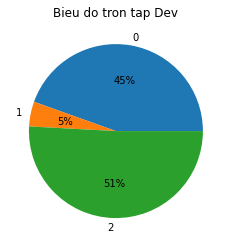

In [98]:
plt.pie(x=list_label3.values(),labels=list_label3.keys(),autopct='%.0f%%')
plt.title("Bieu do tron tap Dev")

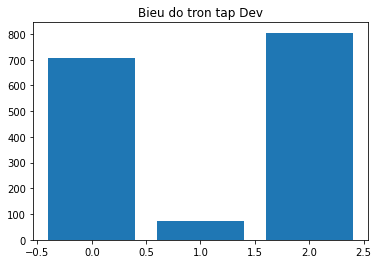

In [99]:
plt.bar(list_label3.keys(), list_label3.values())
plt.title("Bieu do tron tap Dev")
plt.show()

In [100]:
EMBEDDING = '/content/drive/MyDrive/DS201/word2vec_vi_words_100dims.txt'
EMBEDING_DIM = 100
MAX_FEATURE = 10000
word_dict = []
embeddings_index = {}
embedding_dim = EMBEDING_DIM
max_feature = MAX_FEATURE
f = open(EMBEDDING)
for line in f:
 values = line.split(' ')
 word = values[0]
 word_dict.append(word)
try:
 coefs = np.asarray(values[1:], dtype='float32')
 embeddings_index[word] = coefs
except Exception as e:
 pass
f.close()
print('Embedding data loaded')


Embedding data loaded


In [101]:
words = word_dict
num_words = len(words)
# Dictionary word:index pair
# word is key and its value is corresponding index


In [102]:
word_to_index = {w : i + 2 for i, w in enumerate(words)}
word_to_index["UNK"] = 1
word_to_index["PAD"] = 0
# Dictionary label:index pair
idx2word = {i: w for w, i in word_to_index.items()}

In [103]:
import numpy as np
embedding_matrix = np.zeros((num_words, embedding_dim))
# for each word in out tokenizer, try to find that work in our w2v model
for word, i in word_to_index.items():
 if i > max_feature:
  continue
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
# add that words vector to the matrix
     embedding_matrix[i] = embedding_vector
  else:
# doesn't exist, assign a random vector
    embedding_matrix[i] = np.random.randn(embedding_dim)

In [104]:
word_to_index

{'1587507': 2,
 ',': 3,
 '.': 4,
 'và': 5,
 'của': 6,
 'là': 7,
 'các': 8,
 'có': 9,
 'được': 10,
 'trong': 11,
 'cho': 12,
 'đã': 13,
 'với': 14,
 'một': 15,
 'không': 16,
 'người': 17,
 ')': 18,
 '(': 19,
 'những': 20,
 '"': 21,
 'này': 22,
 'để': 23,
 'ở': 24,
 'khi': 25,
 ':': 26,
 'về': 27,
 'năm': 28,
 'đến': 29,
 '-': 30,
 'cũng': 31,
 'vào': 32,
 'trên': 33,
 'tại': 34,
 'nhiều': 35,
 'đó': 36,
 'sẽ': 37,
 'từ': 38,
 'ra': 39,
 'phải': 40,
 'như': 41,
 'ngày': 42,
 'lại': 43,
 'bị': 44,
 'ông': 45,
 'làm': 46,
 'hơn': 47,
 'việc': 48,
 'còn': 49,
 'nhưng': 50,
 'đang': 51,
 'sau': 52,
 'thì': 53,
 'biết': 54,
 'Việt_Nam': 55,
 'đi': 56,
 'nước': 57,
 'rất': 58,
 'mới': 59,
 'sự': 60,
 'có_thể': 61,
 'theo': 62,
 'mà': 63,
 ';': 64,
 'nhất': 65,
 'chỉ': 66,
 'mình': 67,
 'nhà': 68,
 'tôi': 69,
 'trước': 70,
 'lên': 71,
 'vẫn': 72,
 'tới': 73,
 'con': 74,
 'nên': 75,
 'tháng': 76,
 'Theo': 77,
 '2': 78,
 'đồng': 79,
 'cùng': 80,
 'hai': 81,
 'anh': 82,
 'khác': 83,
 'cao': 84,
 '

In [105]:
pip install vncorenlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [106]:
!mkdir -p vncorenlp/models/wordsegmenter
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/wordsegmenter.rdr
!mv VnCoreNLP-1.1.1.jar vncorenlp/
!mv vi-vocab vncorenlp/models/wordsegmenter/
!mv wordsegmenter.rdr vncorenlp/models/wordsegmenter/


--2022-12-19 15:12:30--  https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27412575 (26M) [application/octet-stream]
Saving to: ‘VnCoreNLP-1.1.1.jar’

VnCoreNLP-1.1.1.jar 100%[===================>]  26.14M  --.-KB/s    in 0.09s   

2022-12-19 15:12:30 (285 MB/s) - ‘VnCoreNLP-1.1.1.jar’ saved [27412575/27412575]

--2022-12-19 15:12:30--  https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting respon

In [107]:
from vncorenlp import VnCoreNLP

vncorenlp = VnCoreNLP("vncorenlp/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m')

def custom_tokenizer(text_data, tokenizer=True):
 if tokenizer:
   return " ".join(vncorenlp.tokenize(str(text_data))[0])
 return text_data


In [108]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
MAX_LEN = 100
NUM_LABEL = 3
TOKENIZER = True
def encoding(X, y):
  sentences = []
  for t in X:
   sentences.append(custom_tokenizer(t, tokenizer=TOKENIZER))
  X = []
  for s in sentences:
    sent = []
    for w in s.split():
     try:
      w = w.lower()
      sent.append(word_to_index[w])
     except:
      sent.append(word_to_index["UNK"])
    X.append(sent)

  X = pad_sequences(maxlen = MAX_LEN, sequences = X,
     padding = "post", value = word_to_index["PAD"])
  y = to_categorical(y, num_classes=NUM_LABEL)
  return (X,y)

In [109]:
X_train_encoded, y_train_encoded = encoding(X_train.values.flatten(),y_train)
X_dev_encoded, y_dev_encoded = encoding(X_dev.values.flatten(), y_dev)
X_test_encoded, y_test_encoded = encoding(X_test.values.flatten(), y_test)

In [110]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten ,Input, Dropout
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.layers import  Embedding, Bidirectional, LSTM, TimeDistributed
from tensorflow.keras.initializers import Constant


In [111]:
model = Sequential()
model.add(Input(shape=(MAX_LEN, ), dtype="float64"))
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, embeddings_initializer=Constant(embedding_matrix), input_length=MAX_LEN, trainable=False))
model.add(Bidirectional(LSTM(200, return_sequences=False)))
model.add(Dense(3, activation='softmax'))


In [112]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 100)          158750800 
                                                                 
 bidirectional_4 (Bidirectio  (None, 400)              481600    
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 3)                 1203      
                                                                 
Total params: 159,233,603
Trainable params: 482,803
Non-trainable params: 158,750,800
_________________________________________________________________


In [113]:
optimizer = Adam(learning_rate=0.01)
loss = CategoricalCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


In [114]:
history= model.fit(X_train_encoded, y_train_encoded, batch_size=128,epochs=10,validation_data=(X_dev_encoded, y_dev_encoded))

Epoch 1/10
90/90 [==============================] - 6s 33ms/step - loss: 0.9211 - accuracy: 0.4842 - val_loss: 0.8513 - val_accuracy: 0.4454
Epoch 2/10
90/90 [==============================] - 2s 23ms/step - loss: 0.8364 - accuracy: 0.4860 - val_loss: 0.8534 - val_accuracy: 0.4454
Epoch 3/10
90/90 [==============================] - 2s 23ms/step - loss: 0.8372 - accuracy: 0.4820 - val_loss: 0.8561 - val_accuracy: 0.4454
Epoch 4/10
90/90 [==============================] - 2s 24ms/step - loss: 0.8362 - accuracy: 0.4832 - val_loss: 0.8464 - val_accuracy: 0.5085
Epoch 5/10
90/90 [==============================] - 2s 24ms/step - loss: 0.8363 - accuracy: 0.4831 - val_loss: 0.8462 - val_accuracy: 0.5085
Epoch 6/10
90/90 [==============================] - 2s 24ms/step - loss: 0.8354 - accuracy: 0.4848 - val_loss: 0.8463 - val_accuracy: 0.5085
Epoch 7/10
90/90 [==============================] - 2s 24ms/step - loss: 0.8348 - accuracy: 0.4949 - val_loss: 0.8538 - val_accuracy: 0.4454
Epoch 8/10
90

In [115]:
y_pred = model.predict(X_test_encoded)
y_pred_label = np.argmax(y_pred,axis=-1)

99/99 [==============================] - 1s 7ms/step


In [116]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_label)*100

50.22109917877447

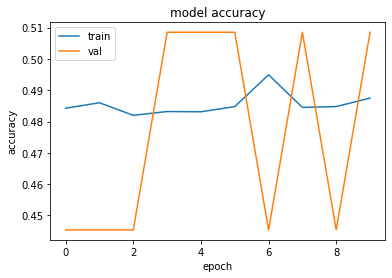

In [117]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

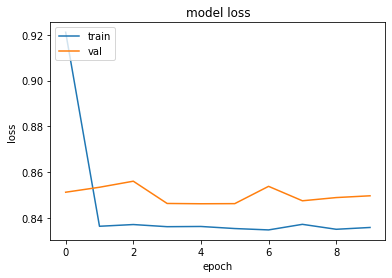

In [118]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

#2

In [119]:
train = '/content/drive/MyDrive/Ds310/PhoNER_COVID19-main/data/word/train_word.conll'
dev = '/content/drive/MyDrive/Ds310/PhoNER_COVID19-main/data/word/dev_word.conll'
test = '/content/drive/MyDrive/Ds310/PhoNER_COVID19-main/data/word/test_word.conll'

In [120]:
def load_data_and_labels(filename, encoding='utf-8'):
 sents, labels = [], []
 words, tags = [], []
 with open(filename, encoding=encoding) as f:
  for line in f:
   try:
    line = line.strip()
    if line:
     word, tag = line.split(" ")
     words.append(word)
     tags.append(tag)
    else:
     sents.append(words)
     labels.append(tags)
     words, tags = [], []
   except Exception as e:
    pass
 return sents, labels
train_set = load_data_and_labels(train)
dev_set = load_data_and_labels(dev)
test_set = load_data_and_labels(test)

In [121]:
tags = list(set(np.concatenate((np.concatenate(train_set[1]),np.concatenate(dev_set[1])))))


In [122]:
tags

['B-DATE',
 'B-ORGANIZATION',
 'B-TRANSPORTATION',
 'I-JOB',
 'B-LOCATION',
 'B-GENDER',
 'B-JOB',
 'B-PATIENT_ID',
 'O',
 'I-ORGANIZATION',
 'I-TRANSPORTATION',
 'I-SYMPTOM_AND_DISEASE',
 'B-AGE',
 'I-DATE',
 'I-LOCATION',
 'B-SYMPTOM_AND_DISEASE',
 'B-NAME',
 'I-PATIENT_ID',
 'I-NAME',
 'I-AGE']

In [123]:
words2index = {w:i for i,w in enumerate(word_dict)}
tags2index = {t:i for i,t in enumerate(tags)}

In [124]:
words2index

{'1587507': 0,
 ',': 1,
 '.': 2,
 'và': 3,
 'của': 4,
 'là': 5,
 'các': 6,
 'có': 7,
 'được': 8,
 'trong': 9,
 'cho': 10,
 'đã': 11,
 'với': 12,
 'một': 13,
 'không': 14,
 'người': 15,
 ')': 16,
 '(': 17,
 'những': 18,
 '"': 19,
 'này': 20,
 'để': 21,
 'ở': 22,
 'khi': 23,
 ':': 24,
 'về': 25,
 'năm': 26,
 'đến': 27,
 '-': 28,
 'cũng': 29,
 'vào': 30,
 'trên': 31,
 'tại': 32,
 'nhiều': 33,
 'đó': 34,
 'sẽ': 35,
 'từ': 36,
 'ra': 37,
 'phải': 38,
 'như': 39,
 'ngày': 40,
 'lại': 41,
 'bị': 42,
 'ông': 43,
 'làm': 44,
 'hơn': 45,
 'việc': 46,
 'còn': 47,
 'nhưng': 48,
 'đang': 49,
 'sau': 50,
 'thì': 51,
 'biết': 52,
 'Việt_Nam': 53,
 'đi': 54,
 'nước': 55,
 'rất': 56,
 'mới': 57,
 'sự': 58,
 'có_thể': 59,
 'theo': 60,
 'mà': 61,
 ';': 62,
 'nhất': 63,
 'chỉ': 64,
 'mình': 65,
 'nhà': 66,
 'tôi': 67,
 'trước': 68,
 'lên': 69,
 'vẫn': 70,
 'tới': 71,
 'con': 72,
 'nên': 73,
 'tháng': 74,
 'Theo': 75,
 '2': 76,
 'đồng': 77,
 'cùng': 78,
 'hai': 79,
 'anh': 80,
 'khác': 81,
 'cao': 82,
 'họ

In [125]:
tags2index

{'B-DATE': 0,
 'B-ORGANIZATION': 1,
 'B-TRANSPORTATION': 2,
 'I-JOB': 3,
 'B-LOCATION': 4,
 'B-GENDER': 5,
 'B-JOB': 6,
 'B-PATIENT_ID': 7,
 'O': 8,
 'I-ORGANIZATION': 9,
 'I-TRANSPORTATION': 10,
 'I-SYMPTOM_AND_DISEASE': 11,
 'B-AGE': 12,
 'I-DATE': 13,
 'I-LOCATION': 14,
 'B-SYMPTOM_AND_DISEASE': 15,
 'B-NAME': 16,
 'I-PATIENT_ID': 17,
 'I-NAME': 18,
 'I-AGE': 19}

In [126]:
def encoding(data):
 X = [[words2index.get(w, 0) for w in t] for t in data[0]]
 X  = pad_sequences(maxlen = MAX_LEN,  sequences = X, padding = "post", value = 0)
 y = [[tags2index[w] for w in s] for s in data[1]]
 y = pad_sequences(maxlen=MAX_LEN,sequences=y, padding="post", value=tags2index["O"])
 return X, y
X_train, y_train = encoding(train_set)
X_dev, y_dev = encoding(dev_set)
X_test, y_test = encoding(test_set)
y_train = to_categorical(y_train, num_classes=len(tags))
y_dev = to_categorical(y_dev, num_classes=len(tags))


In [127]:
model1 = Sequential()
model1.add(Input(shape=(MAX_LEN,)))
model1.add(Embedding(input_dim=len(words)+2,output_dim=EMBEDING_DIM, input_length=MAX_LEN,mask_zero=True, trainable=False))
model1.add(Bidirectional(LSTM(units=512, return_sequences=True,
recurrent_dropout=0.2, dropout=0.2)))


In [128]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 100)          158751000 
                                                                 
 bidirectional_5 (Bidirectio  (None, 100, 1024)        2510848   
 nal)                                                            
                                                                 
Total params: 161,261,848
Trainable params: 2,510,848
Non-trainable params: 158,751,000
_________________________________________________________________


In [129]:
model1.add(TimeDistributed(Dense(len(tags), activation="softmax")))

In [130]:
optimizer = Adam(learning_rate=0.01)
loss = CategoricalCrossentropy()
model1.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])


In [131]:
history1= model1.fit(X_train, y_train, batch_size=128,epochs=3,validation_data=(X_dev, y_dev))

Epoch 1/3
40/40 [==============================] - 46s 1s/step - loss: 0.3010 - accuracy: 0.7714 - val_loss: 0.2920 - val_accuracy: 0.7504
Epoch 2/3
40/40 [==============================] - 40s 989ms/step - loss: 0.2064 - accuracy: 0.8030 - val_loss: 0.2061 - val_accuracy: 0.7991
Epoch 3/3
40/40 [==============================] - 41s 1s/step - loss: 0.1410 - accuracy: 0.8606 - val_loss: 0.1691 - val_accuracy: 0.8373


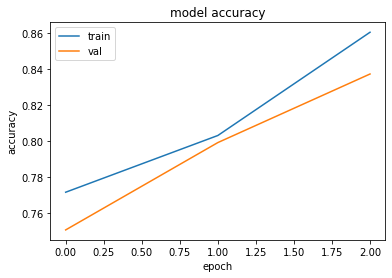

In [132]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

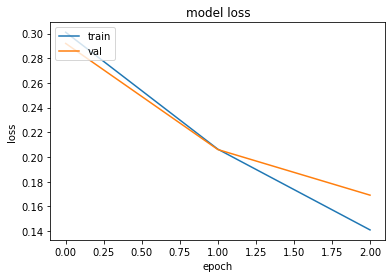

In [133]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

In [134]:
y_pred1 = model1.predict(X_test_encoded)
y_pred_label1 = np.argmax(y_pred1,axis=-1)

99/99 [==============================] - 10s 92ms/step


In [135]:
import numpy as np
from sklearn.metrics import accuracy_score
acc = []

for i in range(0, len(y_test)):
 acc.append(accuracy_score(y_test[i], y_pred_label1[i]))
  
np.mean(acc)*100 

91.62866666666667

#BAITAP

##Cau1

In [136]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 100)          158750800 
                                                                 
 bidirectional_4 (Bidirectio  (None, 400)              481600    
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 3)                 1203      
                                                                 
Total params: 159,233,603
Trainable params: 482,803
Non-trainable params: 158,750,800
_________________________________________________________________


In [137]:
y_test = pd.read_csv('/content/drive/MyDrive/ UIT-VSFC/test/sentiments.txt', sep='\n', header=None, index_col=None)

In [138]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [139]:
print("accuracy: ", accuracy_score(y_test, y_pred_label)*100)
print("precision score: ", precision_score(y_test, y_pred_label, average="macro")*100)
print("recall score: ", recall_score(y_test, y_pred_label, average="macro")*100)
print("f1 score (macro): ", f1_score(y_test, y_pred_label, average="macro")*100)

accuracy:  50.22109917877447
precision score:  16.740366392924823
recall score:  33.33333333333333
f1 score (macro):  22.287636669470142


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Cau2

In [150]:
import pandas as pd
X_train = pd.read_csv('/content/drive/MyDrive/ UIT-VSFC/train/sents.txt', sep='\n', header=None, index_col=None)
y_train = pd.read_csv('/content/drive/MyDrive/ UIT-VSFC/train/sentiments.txt', sep='\n', header=None, index_col=None)

X_dev = pd.read_csv('/content/drive/MyDrive/ UIT-VSFC/dev/sents.txt', sep='\n', header=None, index_col=None)
y_dev = pd.read_csv('/content/drive/MyDrive/ UIT-VSFC/dev/sentiments.txt', sep='\n', header=None, index_col=None)

X_test = pd.read_csv('/content/drive/MyDrive/ UIT-VSFC/test/sents.txt', sep='\n', header=None, index_col=None)
y_test = pd.read_csv('/content/drive/MyDrive/ UIT-VSFC/test/sentiments.txt', sep='\n', header=None, index_col=None)

y_train = y_train.values.flatten()
y_dev = y_dev.values.flatten()
y_test = y_test.values.flatten()


In [141]:
EMBEDDING = '/content/drive/MyDrive/DS201/word2vec_vi_words_100dims.txt'
EMBEDING_DIM = 100
MAX_FEATURE = 10000
word_dict = []
embeddings_index = {}
embedding_dim = EMBEDING_DIM
max_feature = MAX_FEATURE
f = open(EMBEDDING)
for line in f:
 values = line.split(' ')
 word = values[0]
 word_dict.append(word)
try:
 coefs = np.asarray(values[1:], dtype='float32')
 embeddings_index[word] = coefs
except Exception as e:
 pass
f.close()
print('Embedding data loaded')


Embedding data loaded


In [142]:
# word to index
words = word_dict
num_words = len(words)
# Dictionary word:index pair
# word is key and its value is corresponding index
word_to_index = {w : i + 2 for i, w in enumerate(words)}
word_to_index["UNK"] = 1
word_to_index["PAD"] = 0
# Dictionary label:index pair
idx2word = {i: w for w, i in word_to_index.items()}

In [144]:
import numpy as np
embedding_matrix = np.zeros((num_words, embedding_dim))

for word, i in word_to_index.items():
  if i > max_feature:
    continue
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector
  else:
    embedding_matrix[i] = np.random.randn(embedding_dim)

In [145]:
!mkdir -p vncorenlp/models/wordsegmenter
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/wordsegmenter.rdr
!mv VnCoreNLP-1.1.1.jar vncorenlp/
!mv vi-vocab vncorenlp/models/wordsegmenter/
!mv wordsegmenter.rdr vncorenlp/models/wordsegmenter/

--2022-12-19 15:42:37--  https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27412575 (26M) [application/octet-stream]
Saving to: ‘VnCoreNLP-1.1.1.jar’

VnCoreNLP-1.1.1.jar 100%[===================>]  26.14M  --.-KB/s    in 0.1s    

2022-12-19 15:42:37 (257 MB/s) - ‘VnCoreNLP-1.1.1.jar’ saved [27412575/27412575]

--2022-12-19 15:42:37--  https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting respon

In [146]:
from vncorenlp import VnCoreNLP
vncorenlp = VnCoreNLP("vncorenlp/VnCoreNLP-1.1.1.jar",
                      annotators="wseg", max_heap_size='-Xmx500m')

def custom_tokenizer(text_data, tokenizer=True):
  if tokenizer:
    return " ".join(vncorenlp.tokenize(str(text_data))[0])
  return text_data

In [147]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
MAX_LEN = 100
NUM_LABEL = 3
TOKENIZER = True

def encoding(X, y):
  sentences = []

  for t in X:
    sentences.append(custom_tokenizer(t, tokenizer=TOKENIZER))

  X = []
  for s in sentences:
    sent = []
    for w in s.split():
      try:
        w = w.lower()
        sent.append(word_to_index[w])
      except:
        sent.append(word_to_index["UNK"])
    X.append(sent)

  X = pad_sequences(maxlen = MAX_LEN, sequences = X, padding = "post", value = word_to_index["PAD"])
  y = to_categorical(y, num_classes=NUM_LABEL)
  return (X,y)


In [151]:
X_train_encoded, y_train_encoded = encoding(X_train.values.flatten(), y_train)
X_dev_encoded, y_dev_encoded = encoding(X_dev.values.flatten(), y_dev)
X_test_encoded, y_test_encoded = encoding(X_test.values.flatten(), y_test)

In [152]:
model3 = Sequential()
model3.add(Input(shape=(MAX_LEN, ), dtype="float64"))
model3.add(Embedding(input_dim=num_words, output_dim=embedding_dim, embeddings_initializer=Constant(embedding_matrix), input_length=MAX_LEN, trainable=False))
model3.add(Bidirectional(LSTM(200, return_sequences=True)))
model3.add(Bidirectional(LSTM(200, return_sequences=False)))

model3.add(Dense(3, activation='softmax'))

In [153]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 100)          158750800 
                                                                 
 bidirectional_6 (Bidirectio  (None, 100, 400)         481600    
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 400)              961600    
 nal)                                                            
                                                                 
 dense_5 (Dense)             (None, 3)                 1203      
                                                                 
Total params: 160,195,203
Trainable params: 1,444,403
Non-trainable params: 158,750,800
_________________________________________________________________


In [154]:
model3.compile(optimizer=Adam(learning_rate=0.01), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [155]:
history3 = model3.fit(X_train_encoded, y_train_encoded, batch_size=128,epochs=10,validation_data=(X_dev_encoded, y_dev_encoded))

Epoch 1/10
90/90 [==============================] - 14s 89ms/step - loss: 0.5172 - accuracy: 0.8166 - val_loss: 0.3308 - val_accuracy: 0.8812
Epoch 2/10
90/90 [==============================] - 6s 62ms/step - loss: 0.2882 - accuracy: 0.9029 - val_loss: 0.3011 - val_accuracy: 0.9027
Epoch 3/10
90/90 [==============================] - 6s 63ms/step - loss: 0.2059 - accuracy: 0.9334 - val_loss: 0.2748 - val_accuracy: 0.9052
Epoch 4/10
90/90 [==============================] - 6s 62ms/step - loss: 0.1462 - accuracy: 0.9526 - val_loss: 0.3183 - val_accuracy: 0.9046
Epoch 5/10
90/90 [==============================] - 6s 63ms/step - loss: 0.1084 - accuracy: 0.9649 - val_loss: 0.3262 - val_accuracy: 0.9046
Epoch 6/10
90/90 [==============================] - 6s 63ms/step - loss: 0.0832 - accuracy: 0.9720 - val_loss: 0.3743 - val_accuracy: 0.8989
Epoch 7/10
90/90 [==============================] - 6s 63ms/step - loss: 0.0778 - accuracy: 0.9740 - val_loss: 0.3796 - val_accuracy: 0.8989
Epoch 8/10
9

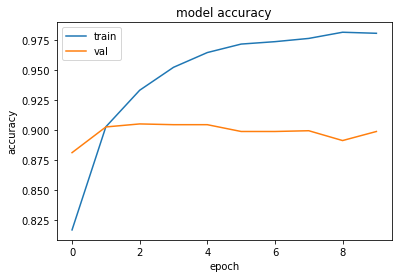

In [156]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

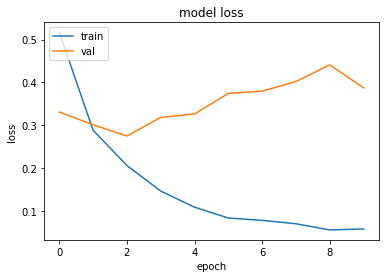

In [157]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

In [158]:
y_pred3 = model3.predict(X_test_encoded)
y_pred_3 = np.argmax(y_pred3, axis=-1)

99/99 [==============================] - 2s 12ms/step


In [159]:
print("accuracy: ", accuracy_score(y_pred_3, y_test)*100)
print("precision score: ", precision_score(y_test, y_pred_3, average="macro")*100)
print("recall score: ", recall_score(y_test, y_pred_3, average="macro")*100)
print("f1 score (macro): ", f1_score(y_test, y_pred_3, average="macro")*100)

accuracy:  88.1238155401137
precision score:  74.32694788637187
recall score:  70.91261919118318
f1 score (macro):  72.19093491257968


NX: Mô hình sử dụng hai lớp BiLSTM kết hợp cho kết quả cao hơn mô hình có 1 lớp BiLSTM ở cả 4 giá trị accuracy, precision, recall, và f1_score

##Câu 3

In [167]:
train = '/content/drive/MyDrive/Ds310/PhoNER_COVID19-main/data/word/train_word.conll'
dev = '/content/drive/MyDrive/Ds310/PhoNER_COVID19-main/data/word/dev_word.conll'
test = '/content/drive/MyDrive/Ds310/PhoNER_COVID19-main/data/word/test_word.conll'

In [168]:
def load_data_and_labels(filename, encoding='utf-8'):
  sents, labels = [], []
  words, tags = [], []
  with open(filename, encoding=encoding) as f:
    for line in f:
      try:
        line = line.strip()
        if line:
          word, tag = line.split(" ")
          words.append(word)
          tags.append(tag)
        else:
          sents.append(words)
          labels.append(tags)
          words, tags = [], []
      except Exception as e:
        pass
  return sents, labels

train_set = load_data_and_labels(train)
dev_set = load_data_and_labels(dev)
test_set = load_data_and_labels(test)

In [170]:
EMBEDDING = '/content/drive/MyDrive/DS201/word2vec_vi_words_100dims.txt'
EMBEDING_DIM = 100
MAX_FEATURE = 10000
word_dict = []
embeddings_index = {}
embedding_dim = EMBEDING_DIM
max_feature = MAX_FEATURE
f = open(EMBEDDING)
for line in f:
 values = line.split(' ')
 word = values[0]
 word_dict.append(word)
try:
 coefs = np.asarray(values[1:], dtype='float32')
 embeddings_index[word] = coefs
except Exception as e:
 pass
f.close()
print('Embedding data loaded')

Embedding data loaded


In [171]:
words2index = {w:i for i,w in enumerate(word_dict)}
tags2index = {t:i for i,t in enumerate(tags)}

In [172]:
def encoding(data):
  X = [[words2index.get(w, 0) for w in t] for t in data[0]]
  X = pad_sequences(maxlen = MAX_LEN, sequences = X, padding = "post", value = 0)
                    
  y = [[tags2index[w] for w in s] for s in data[1]]
  y = pad_sequences(maxlen=MAX_LEN, sequences=y, padding="post", value=tags2index["O"])

  return X, y

X_train, y_train = encoding(train_set)
X_dev, y_dev = encoding(dev_set)
X_test, y_test = encoding(test_set)
y_train = to_categorical(y_train, num_classes=len(tags))
y_dev = to_categorical(y_dev, num_classes=len(tags))

In [173]:
model4 = Sequential()
model4.add(Input(shape=(MAX_LEN,)))
model4.add(Embedding(input_dim=len(words)+2, output_dim=EMBEDING_DIM, 
                    input_length=MAX_LEN,
                    mask_zero=True, trainable=False))
model4.add(Bidirectional(LSTM(units=512, return_sequences=True,
                            recurrent_dropout=0.2, dropout=0.2)))
model4.add(TimeDistributed(Dense(len(tags), activation="softmax")))

In [174]:
model4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 100)          158751000 
                                                                 
 bidirectional_9 (Bidirectio  (None, 100, 1024)        2510848   
 nal)                                                            
                                                                 
 time_distributed_3 (TimeDis  (None, 100, 20)          20500     
 tributed)                                                       
                                                                 
Total params: 161,282,348
Trainable params: 2,531,348
Non-trainable params: 158,751,000
_________________________________________________________________


In [175]:
model4.compile(optimizer=Adam(learning_rate=0.01), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [176]:
history4 = model4.fit(X_train, y_train,epochs=3, batch_size=128,validation_data=(X_dev, y_dev))

Epoch 1/3
40/40 [==============================] - 49s 1s/step - loss: 0.3822 - accuracy: 0.7392 - val_loss: 0.2911 - val_accuracy: 0.7504
Epoch 2/3
40/40 [==============================] - 41s 1s/step - loss: 0.2144 - accuracy: 0.7967 - val_loss: 0.2185 - val_accuracy: 0.7878
Epoch 3/3
40/40 [==============================] - 39s 980ms/step - loss: 0.1818 - accuracy: 0.8215 - val_loss: 0.1866 - val_accuracy: 0.8156


In [177]:
y_pred4 = model4.predict(X_test)
y_pred_4 = np.argmax(y_pred4, axis=-1)

94/94 [==============================] - 10s 94ms/step


In [178]:
acc = []

for i in range(0, len(y_test)):
  acc.append(accuracy_score(y_test[i], y_pred_4[i]))

np.mean(acc)*100

94.54933333333332

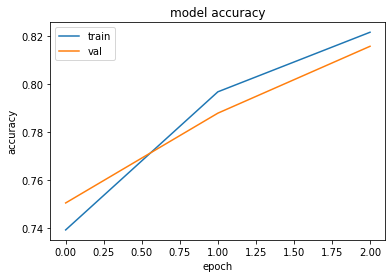

In [179]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

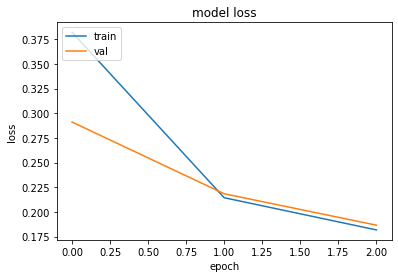

In [180]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

##Cau 4:

In [181]:
train = '/content/drive/MyDrive/Ds310/PhoNER_COVID19-main/data/word/train_word.conll'
dev = '/content/drive/MyDrive/Ds310/PhoNER_COVID19-main/data/word/dev_word.conll'
test = '/content/drive/MyDrive/Ds310/PhoNER_COVID19-main/data/word/test_word.conll'

In [182]:
def load_data_and_labels(filename, encoding='utf-8'):
  sents, labels = [], []
  words, tags = [], []
  with open(filename, encoding=encoding) as f:
    for line in f:
      try:
        line = line.strip()
        if line:
          word, tag = line.split(" ")
          words.append(word)
          tags.append(tag)
        else:
          sents.append(words)
          labels.append(tags)
          words, tags = [], []
      except Exception as e:
        pass
  return sents, labels

train_set = load_data_and_labels(train)
dev_set = load_data_and_labels(dev)
test_set = load_data_and_labels(test)


In [184]:
EMBEDDING = '/content/drive/MyDrive/DS201/word2vec_vi_words_100dims.txt'
EMBEDING_DIM = 100
MAX_FEATURE = 10000
word_dict = []
embeddings_index = {}
embedding_dim = EMBEDING_DIM
max_feature = MAX_FEATURE
f = open(EMBEDDING)
for line in f:
 values = line.split(' ')
 word = values[0]
 word_dict.append(word)
try:
 coefs = np.asarray(values[1:], dtype='float32')
 embeddings_index[word] = coefs
except Exception as e:
 pass
f.close()
print('Embedding data loaded')

Embedding data loaded


In [185]:
tags = list(set(np.concatenate((np.concatenate(train_set[1]),
                                np.concatenate(dev_set[1])))))

In [189]:
syllables2index = {w:i for i,w in enumerate(word_dict)}
tags2index = {t:i for i,t in enumerate(tags)}

In [190]:
def encoding(data):
  X = [[syllables2index.get(w, 0) for w in t] for t in data[0]]
  X = pad_sequences(maxlen = MAX_LEN, sequences = X, padding = "post", value = 0)
                    
  y = [[tags2index[w] for w in s] for s in data[1]]
  y = pad_sequences(maxlen=MAX_LEN, sequences=y, padding="post", value=tags2index["O"])

  return X, y

X_train, y_train = encoding(train_set)
X_dev, y_dev = encoding(dev_set)
X_test, y_test = encoding(test_set)
y_train = to_categorical(y_train, num_classes=len(tags))
y_dev = to_categorical(y_dev, num_classes=len(tags))

In [191]:
model5 = Sequential()
model5.add(Input(shape=(MAX_LEN,)))
model5.add(Embedding(input_dim=len(words)+2, output_dim=EMBEDING_DIM, 
                    input_length=MAX_LEN,
                    mask_zero=True, trainable=False))
model5.add(Bidirectional(LSTM(units=512, return_sequences=True,
                            recurrent_dropout=0.2, dropout=0.2)))
model5.add(TimeDistributed(Dense(len(tags), activation="softmax")))

In [192]:
model5.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 100, 100)          158751000 
                                                                 
 bidirectional_11 (Bidirecti  (None, 100, 1024)        2510848   
 onal)                                                           
                                                                 
 time_distributed_5 (TimeDis  (None, 100, 20)          20500     
 tributed)                                                       
                                                                 
Total params: 161,282,348
Trainable params: 2,531,348
Non-trainable params: 158,751,000
_________________________________________________________________


In [193]:
model5.compile(optimizer=Adam(learning_rate=0.01), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [194]:
history5 = model5.fit(X_train, y_train,epochs=3, batch_size=128,validation_data=(X_dev, y_dev))

Epoch 1/3
40/40 [==============================] - 47s 1s/step - loss: 0.3003 - accuracy: 0.7701 - val_loss: 0.2869 - val_accuracy: 0.7502
Epoch 2/3
40/40 [==============================] - 41s 1s/step - loss: 0.2275 - accuracy: 0.7905 - val_loss: 0.2389 - val_accuracy: 0.7689
Epoch 3/3
40/40 [==============================] - 40s 1s/step - loss: 0.1646 - accuracy: 0.8322 - val_loss: 0.1756 - val_accuracy: 0.8338


In [195]:
y_pred5 = model5.predict(X_test)
y_pred_5 = np.argmax(y_pred5, axis=-1)
acc = []

for i in range(0, len(y_test)):
  acc.append(accuracy_score(y_test[i], y_pred_5[i]))

np.mean(acc)*100

94/94 [==============================] - 9s 89ms/step


95.06700000000001

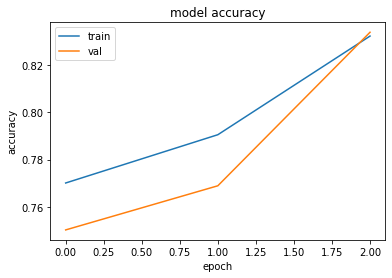

In [206]:
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

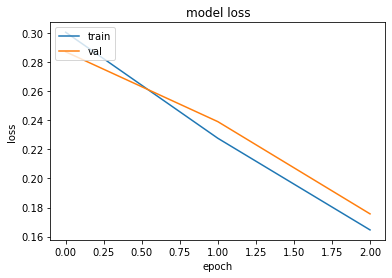

In [207]:
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

##Cau 5

In [196]:
train = '/content/drive/MyDrive/Ds310/PhoNER_COVID19-main/data/word/train_word.conll'
dev = '/content/drive/MyDrive/Ds310/PhoNER_COVID19-main/data/word/dev_word.conll'
test = '/content/drive/MyDrive/Ds310/PhoNER_COVID19-main/data/word/test_word.conll'

In [197]:
def load_data_and_labels(filename, encoding='utf-8'):
  sents, labels = [], []
  words, tags = [], []
  with open(filename, encoding=encoding) as f:
    for line in f:
      try:
        line = line.strip()
        if line:
          word, tag = line.split(" ")
          words.append(word)
          tags.append(tag)
        else:
          sents.append(words)
          labels.append(tags)
          words, tags = [], []
      except Exception as e:
        pass
  return sents, labels

train_set = load_data_and_labels(train)
dev_set = load_data_and_labels(dev)
test_set = load_data_and_labels(test)

In [198]:
EMBEDDING = '/content/drive/MyDrive/DS201/word2vec_vi_words_100dims.txt'
EMBEDING_DIM = 100
MAX_FEATURE = 10000
word_dict = []
embeddings_index = {}
embedding_dim = EMBEDING_DIM
max_feature = MAX_FEATURE
f = open(EMBEDDING)
for line in f:
 values = line.split(' ')
 word = values[0]
 word_dict.append(word)
try:
 coefs = np.asarray(values[1:], dtype='float32')
 embeddings_index[word] = coefs
except Exception as e:
 pass
f.close()
print('Embedding data loaded')

Embedding data loaded


In [199]:
tags = list(set(np.concatenate((np.concatenate(train_set[1]),
                                np.concatenate(dev_set[1])))))

In [200]:
words2index = {w:i for i,w in enumerate(word_dict)}
tags2index = {t:i for i,t in enumerate(tags)}

In [201]:
def encoding(data):
  X = [[words2index.get(w, 0) for w in t] for t in data[0]]
  X = pad_sequences(maxlen = MAX_LEN, sequences = X, padding = "post", value = 0)
                    
  y = [[tags2index[w] for w in s] for s in data[1]]
  y = pad_sequences(maxlen=MAX_LEN, sequences=y, padding="post", value=tags2index["O"])

  return X, y

X_train, y_train = encoding(train_set)
X_dev, y_dev = encoding(dev_set)
X_test, y_test = encoding(test_set)
y_train = to_categorical(y_train, num_classes=len(tags))
y_dev = to_categorical(y_dev, num_classes=len(tags))

In [202]:
model6 = Sequential()
model6.add(Input(shape=(MAX_LEN,)))
model6.add(Embedding(input_dim=len(words)+2, output_dim=EMBEDING_DIM, input_length=MAX_LEN,mask_zero=True, trainable=False))
model6.add(Bidirectional(LSTM(units=512, return_sequences=True,recurrent_dropout=0.2, dropout=0.2)))
model6.add(Bidirectional(LSTM(units=512, return_sequences=True,recurrent_dropout=0.2, dropout=0.2)))
model6.add(TimeDistributed(Dense(len(tags), activation="softmax")))

In [203]:
model6.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 100, 100)          158751000 
                                                                 
 bidirectional_12 (Bidirecti  (None, 100, 1024)        2510848   
 onal)                                                           
                                                                 
 bidirectional_13 (Bidirecti  (None, 100, 1024)        6295552   
 onal)                                                           
                                                                 
 time_distributed_6 (TimeDis  (None, 100, 20)          20500     
 tributed)                                                       
                                                                 
Total params: 167,577,900
Trainable params: 8,826,900
Non-trainable params: 158,751,000
_______________________________

In [204]:
model6.compile(optimizer=Adam(learning_rate=0.01), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [205]:
history6 = model6.fit(X_train, y_train,epochs=3, batch_size=128,validation_data=(X_dev, y_dev))

Epoch 1/3
40/40 [==============================] - 107s 2s/step - loss: 0.8635 - accuracy: 0.7730 - val_loss: 1.1121 - val_accuracy: 0.7504
Epoch 2/3
40/40 [==============================] - 89s 2s/step - loss: 0.8755 - accuracy: 0.7908 - val_loss: 1.1121 - val_accuracy: 0.7504
Epoch 3/3
40/40 [==============================] - 85s 2s/step - loss: 0.8755 - accuracy: 0.7908 - val_loss: 1.1121 - val_accuracy: 0.7504


In [208]:
y_pred6 = model6.predict(X_test)
y_pred_6 = np.argmax(y_pred6, axis=-1)
acc = []

for i in range(0, len(y_test)):
  acc.append(accuracy_score(y_test[i], y_pred_6[i]))

np.mean(acc)*100

94/94 [==============================] - 18s 171ms/step


92.64333333333335

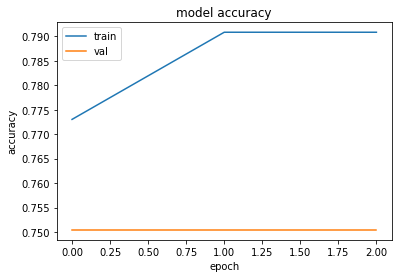

In [210]:
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()

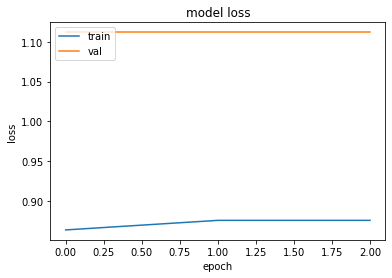

In [211]:
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()